In [1]:
# Initialize Otter
import otter 
grader = otter.Notebook()


## Homework 2: Pandas Review

**This lab is due Monday, October 14th at 11:59 PM.**

### Collaboration Policy

Data science is a collaborative activity. While you may talk with others about the labs, we ask that you **write your solutions individually**. If you do discuss the assignments with others please **include their names** below. (That's a good way to learn your classmates' names.)

**Collaborators**: Owen Larimer

[Pandas](https://pandas.pydata.org/) is one of the most widely used Python libraries in data science. In this lab, you will review the commonly used data wrangling operations/tools in Pandas. We aim to give you familiarity with:

* Creating dataframes
* Slicing data frames (i.e. selecting rows and columns)
* Filtering data (using boolean arrays)
* Split-Apply-Combine operations with `.groupby`
* Joining data with `merge`

In this lab you are going to use several pandas methods, such as `drop` and `loc`. You may enter `help(method_name)` to see helpful documentation for that method. If you are still familar with the `datascience` library used in DSCI 101/102, the conversion reference notebook included with the assignment might serve useful. 

**Note**: The Pandas interface is notoriously confusing, and the documentation is not consistently great. Throughout the semester, you will have to search through Pandas documentation and experiment, but remember it is part of the learning experience and will help shape you as a data scientist!

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

## Section 1: Creating DataFrames & Basic Manipulations

A [dataframe](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe) is a table in which each column has a type; there is an index over the columns (typically string labels) and an index over the rows (typically ordinal numbers).

The [docs](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) for the pandas `DataFrame` class  provide at least two syntaxes to create a data frame.

**Syntax 1: ** You can create a data frame by specifying the columns and values using a dictionary as shown below. 

The keys of the dictionary are the column names, and the values of the dictionary are lists containing the row entries.

In [3]:
fruit_info = pd.DataFrame(
    data={'fruit': ['apple', 'orange', 'banana', 'raspberry'],
          'color': ['red', 'orange', 'yellow', 'pink']
          })
fruit_info

,fruit,color
0,apple,red
1,orange,orange
2,banana,yellow
3,raspberry,pink


**Syntax 2: ** You can also define a dataframe by specifying the rows like below. 

Each row corresponds to a distinct tuple, and the columns are specified separately.

In [4]:
fruit_info2 = pd.DataFrame(
    [("red", "apple"), ("orange", "orange"), ("yellow", "banana"),
     ("pink", "raspberry")], 
    columns = ["color", "fruit"])
fruit_info2

,color,fruit
0,red,apple
1,orange,orange
2,yellow,banana
3,pink,raspberry


You can obtain the dimensions of a dataframe by using the shape attribute `dataframe.shape`.

In [5]:
fruit_info.shape

(4, 2)

You can also convert the entire dataframe into a two-dimensional numpy array.

In [6]:
fruit_info.values

array([['apple', 'red'],
       ['orange', 'orange'],
       ['banana', 'yellow'],
       ['raspberry', 'pink']], dtype=object)

### Question 1.1

For a DataFrame `d`, you can add a column with `d['new column name'] = ...` and assign a list or array of values to the column. Add a column of integers containing 1, 2, 3, and 4 called `rank1` to the `fruit_info` table which expresses your personal preference about the taste ordering for each fruit (1 is tastiest; 4 is least tasty). 

In [7]:
fruit_info["rank1"] = [2,3,4,1]
fruit_info

,fruit,color,rank1
0,apple,red,2
1,orange,orange,3
2,banana,yellow,4
3,raspberry,pink,1


In [8]:
grader.check("q1_1")

q1_1 results: All test cases passed!

### Question 1.2

Use the `.drop()` method to [drop](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html) the `rank1` column you created. (Make sure to use the `axis` parameter correctly.) Note that `drop` does not change a table, but instead returns a new table with fewer columns or rows unless you set the optional `inplace` parameter.

In [9]:
fruit_info_original = fruit_info.drop("rank1", axis = 1)
fruit_info_original

,fruit,color
0,apple,red
1,orange,orange
2,banana,yellow
3,raspberry,pink


In [10]:
grader.check("q1_2")

q1_2 results: All test cases passed!

### Question 1.3a

Use the `.rename()` method to [rename](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html) the columns of `fruit_info_original` so they begin with capital letters. Set this new dataframe to `fruit_info_caps`.

In [11]:
fruit_info_caps = fruit_info_original.rename(columns = {'fruit': "Fruit", 'color':"Color"})
fruit_info_caps

,Fruit,Color
0,apple,red
1,orange,orange
2,banana,yellow
3,raspberry,pink


In [12]:
grader.check("q1_3a")

q1_3a results: All test cases passed!

### Question 1.3b

Oops! When we labeled the color of apples, we forgot to mention that our apple was a Granny Smith. Use `.replace` to convert the value of red to green in the "Color" column. 

In [13]:
#0
# 
# n = iterations 0 - 300000000 

#
#0 replaced by 1
#1 gets replaced by 2
#2 gets replaced by 0
#add entire new string onto old string

#5 0 -> 01 -> 0112 -> 01121220 -> 0112122012202001

#import numpy as np

#starting_array = np.array([0])
#for i in range(300):
#    new_array = (starting_array + 1) % 3 
#    starting_array = np.append(starting_array, new_array)
    

#len(starting_array)

In [14]:
fruit_info_caps = fruit_info_caps.replace({"Color": {'red': 'green'}}) 
fruit_info_caps

,Fruit,Color
0,apple,green
1,orange,orange
2,banana,yellow
3,raspberry,pink


In [15]:
grader.check("q1_3b")

q1_3b results: All test cases passed!

### Babyname dataset
Now that we have learned the basics, let's move on to the babynames dataset. The babynames dataset contains a record of the given names of babies born in the United States each year.

First let's run the following cells to build the dataframe `baby_names`.
The cells below download the data from the web and extract the data into a dataframe. There should be a total of 6028151 records.

### `fetch_and_cache` Helper

The following function downloads and caches data in the `data/` directory and returns the `Path` to the downloaded file. The cell below the function describes how it works. 

In [16]:
import requests
from pathlib import Path

def fetch_and_cache(data_url, file, data_dir="data", force=False):
    """
    Download and cache a url and return the file object.
    
    data_url: the web address to download
    file: the file in which to save the results.
    data_dir: (default="data") the location to save the data
    force: if true the file is always re-downloaded 
    
    return: The pathlib.Path to the file.
    """
    data_dir = Path(data_dir)
    data_dir.mkdir(exist_ok=True)
    file_path = data_dir/Path(file)
    if force and file_path.exists():
        file_path.unlink()
    if force or not file_path.exists():
        print('Downloading...', end=' ')
        resp = requests.get(data_url)
        with file_path.open('wb') as f:
            f.write(resp.content)
        print('Done!')
    else:
        import time 
        created = time.ctime(file_path.stat().st_ctime)
        print("Using cached version downloaded at", created)
    return file_path

In Python, a `Path` object represents the filesystem paths to files (and other resources). The `pathlib` module is effective for writing code that works on different operating systems and filesystems. 

To check if a file exists at a path, use `.exists()`. To create a directory for a path, use `.mkdir()`. To remove a file that might be a [symbolic link](https://en.wikipedia.org/wiki/Symbolic_link), use `.unlink()`. 

This function creates a path to a directory that will contain data files. It ensures that the directory exists (which is required to write files in that directory), then proceeds to download the file based on its URL.

The benefit of this function is that not only can you force when you want a new file to be downloaded using the `force` parameter, but in cases when you don't need the file to be re-downloaded, you can use the cached version and save download time.

Below we use `fetch_and_cache` to download the `namesbystate.zip` zip file, which is a compressed directory of CSV files. 

**This might take a little while! Consider stretching.**

In [17]:
data_url = 'https://www.ssa.gov/oact/babynames/state/namesbystate.zip'
namesbystate_path = fetch_and_cache(data_url, 'namesbystate.zip')

Using cached version downloaded at Tue Oct  8 11:56:36 2024


The following cell builds the final full `baby_names` DataFrame. It first builds one dataframe per state, because that's how the data are stored in the zip file. Here is documentation for [pd.concat](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.concat.html) if you want to know more about its functionality. 

In [18]:
import zipfile
zf = zipfile.ZipFile(namesbystate_path, 'r')

column_labels = ['State', 'Sex', 'Year', 'Name', 'Count']

def load_dataframe_from_zip(zf, f):
    with zf.open(f) as fh: 
        return pd.read_csv(fh, header=None, names=column_labels)

states = [
    load_dataframe_from_zip(zf, f)
    for f in sorted(zf.filelist, key=lambda x:x.filename) 
    if f.filename.endswith('.TXT')
]

baby_names = states[0]
for state_df in states[1:]:
    baby_names = pd.concat([baby_names, state_df])
baby_names = baby_names.reset_index().iloc[:, 1:]

In [19]:
len(baby_names)

6408041

In [20]:
baby_names.head()

,State,Sex,Year,Name,Count
0,AK,F,1910,Mary,14
1,AK,F,1910,Annie,12
2,AK,F,1910,Anna,10
3,AK,F,1910,Margaret,8
4,AK,F,1910,Helen,7


## Slicing Data Frames - selecting rows and columns


### Selection Using Label/Index (using loc)

**Column Selection** 

To select a column of a `DataFrame` by column label, the safest and fastest way is to use the `.loc` [method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html). General usage of `.loc` looks like `df.loc[rowname, colname]`. (Reminder that the colon `:` means "everything.")  For example, if we want the `color` column of the `ex` data frame, we would use: `ex.loc[:, 'color']`

- You can also slice across columns. For example, `baby_names.loc[:, 'Name':]` would select the column `Name` and all columns after `Name`.

- *Alternative:* While `.loc` is invaluable when writing production code (it is fast), it may be a little too verbose for interactive use. One recommended alternative is the `[]` method, which takes on the form `df['colname']`.

**Row Selection**

Similarly, if we want to select a row by its label, we can use the same `.loc` method. In this case, the "label" of each row refers to the index (ie. primary key) of the dataframe.

In [21]:
#Example:
baby_names.loc[2:5, 'Name']

2        Anna
3    Margaret
4       Helen
5       Elsie
Name: Name, dtype: object

In [22]:
#Example:  Notice the difference between these two methods
#Just passing in 'Name' returns a Series while ['Name'] returns a Dataframe
baby_names.loc[2:5, ['Name']]

,Name
2,Anna
3,Margaret
4,Helen
5,Elsie


The `.loc` actually uses the Pandas row index rather than row id/position of rows in the dataframe to perform the selection. Also, notice that if you write `2:5` with `loc[]`, contrary to normal Python slicing functionality, the end index is included, so you get the row with index 5. 


### Selection using Integer location (using iloc)

`iloc[]` lets you slice the dataframe by row position and column position instead of by row index and column label (which is the case for `loc[]`). This is really the main difference between the 2 functions and it is **important** that you remember the difference and why you might want to use one over the other. In addition, with `iloc[]`, the end index is NOT included, like with normal Python slicing.

As a mnemonic, remember that the i in `iloc` means "integer". 

Below, we have sorted the `baby_names` dataframe. Notice how the *position* of a row is not necessarily equal to the *index* of a row. For example, the first row is not necessarily the row associated with index 1. This distinction is important in understanding the different between `loc[]` and `iloc[]`.

In [23]:
sorted_baby_names = baby_names.sort_values(by=['Name'])
sorted_baby_names.head()

,State,Sex,Year,Name,Count
4365811,NY,M,2013,Aaban,6
4367894,NY,M,2014,Aaban,6
4378195,NY,M,2019,Aadam,6
771544,CA,M,2009,Aadan,6
786429,CA,M,2014,Aadan,5


Here is an example of how we would get the 2nd, 3rd, and 4th rows with only the `Name` column of the `baby_names` dataframe using both `iloc[]` and `loc[]`. Observe the difference, especially after sorting `baby_names` by name.

In [24]:
sorted_baby_names.iloc[1:4, 3]

4367894    Aaban
4378195    Aadam
771544     Aadan
Name: Name, dtype: object

Notice that using `loc[]` with 1:4 gives different results, since it selects using the *index*.

In [25]:
sorted_baby_names.loc[1:4, "Name"]

1          Annie
4627738    Annie
4222531    Annie
2272090    Annie
337368     Annie
           ...  
3267232    Helen
1997702    Helen
3302664    Helen
6176186    Helen
4          Helen
Name: Name, Length: 2165783, dtype: object

Lastly, we can change the index of a dataframe using the `set_index` method.

In [26]:
#Example: We change the index from 0,1,2... to the Name column
df = baby_names[:5].set_index("Name") 
df

,State,Sex,Year,Count
Name,,,,
Mary,AK,F,1910,14
Annie,AK,F,1910,12
Anna,AK,F,1910,10
Margaret,AK,F,1910,8
Helen,AK,F,1910,7


We can now lookup rows by name directly:

In [27]:
df.loc[['Mary', 'Anna'], :] #the colon refers to all the columns, can change to index one or multiple columns

,State,Sex,Year,Count
Name,,,,
Mary,AK,F,1910,14
Anna,AK,F,1910,10


However, if we still want to access rows by location we will need to use the integer loc (`iloc`) accessor:

In [28]:
#Example: 
#df.loc[2:5,"Year"] You can't do this
df.iloc[1:4, 2:3]

,Year
Name,
Annie,1910
Anna,1910
Margaret,1910


### Question 1.4

Selecting multiple columns is easy.  You just need to supply a list of column names.  Select the `Name` and `Year` **in that order** from the `baby_names` table.

In [29]:
name_and_year = baby_names.loc[:, ["Name", "Year"]]
name_and_year[:5]

,Name,Year
0,Mary,1910
1,Annie,1910
2,Anna,1910
3,Margaret,1910
4,Helen,1910


In [30]:
grader.check("q1_4")

q1_4 results: All test cases passed!

Note that `.loc[]` can be used to re-order the columns within a dataframe.

## Filtering Data

### Filtering with boolean arrays

Filtering is the process of removing unwanted material.  In your quest for cleaner data, you will undoubtedly filter your data at some point: whether it be for clearing up cases with missing values, for culling out fishy outliers, or for analyzing subgroups of your data set.  Note that compound expressions have to be grouped with parentheses. Example usage looks like `df[df['column name'] < 5]]`.

For your reference, some commonly used comparison operators are given below.

Symbol | Usage      | Meaning 
------ | ---------- | -------------------------------------
==   | a == b   | Does a equal b?
<=   | a <= b   | Is a less than or equal to b?
&#62;=   | a >= b   | Is a greater than or equal to b?
<    | a < b    | Is a less than b?
&#62;    | a &#62; b    | Is a greater than b?
~    | ~p       | Returns negation of p
&#124; | p &#124; q | p OR q
&    | p & q    | p AND q
^  | p ^ q | p XOR q (exclusive or)

In the following we construct the DataFrame containing only names registered in California

In [31]:
ca = baby_names[baby_names['State'] == 'CA']

In [32]:
baby_names.head()

,State,Sex,Year,Name,Count
0,AK,F,1910,Mary,14
1,AK,F,1910,Annie,12
2,AK,F,1910,Anna,10
3,AK,F,1910,Margaret,8
4,AK,F,1910,Helen,7


### Question 1.5
Using a boolean array, select the names in Year 2000 (from `baby_names`) that have larger than 3000 counts. Keep all columns from the original `baby_names` dataframe.

Note: Any time you use `p & q` to filter the dataframe, make sure to use `df[(df[p]) & (df[q])]` or `df.loc[(df[p]) & (df[q])]`. That is, make sure to wrap conditions with parentheses.

**Remember** that both slicing and `loc` will achieve the same result, it is just that the former is a little more idiomatic (readable) while the latter `loc` is typically faster in production. You are free to use whichever one you would like.

In [33]:
result = baby_names[(baby_names["Year"] == 2000) & (baby_names["Count"] > 3000)]
result = baby_names.loc[(baby_names["Year"] ==2000) & (baby_names["Count"] > 3000)] #it's indentical with the exception of the loc call
result.head()

,State,Sex,Year,Name,Count
744864,CA,M,2000,Daniel,4342
744865,CA,M,2000,Anthony,3840
744866,CA,M,2000,Jose,3804
744867,CA,M,2000,Andrew,3600
744868,CA,M,2000,Michael,3572


In [34]:
grader.check("q1_5")

q1_5 results: All test cases passed!

In [35]:
result = baby_names[(baby_names["Year"] == 2000) & (baby_names["Count"] > 3000)]
result = baby_names.loc[(baby_names["Year"] ==2000) & (baby_names["Count"] > 3000)] #it

Optionally, repeat the exercise from above, but this time using the `query` command.

In [36]:
result_using_query = baby_names.query('Year == 2000').query("Count > 3000")
result_using_query.head(5)

,State,Sex,Year,Name,Count
744864,CA,M,2000,Daniel,4342
744865,CA,M,2000,Anthony,3840
744866,CA,M,2000,Jose,3804
744867,CA,M,2000,Andrew,3600
744868,CA,M,2000,Michael,3572


### Question 1.6

Some names gain/lose popularity because of cultural phenomena such as a famous pop star. Below, we plot the popularity of the name Britney in California over time. What do you notice about this plot? What might be the cause of the steep spike around the year 2000?

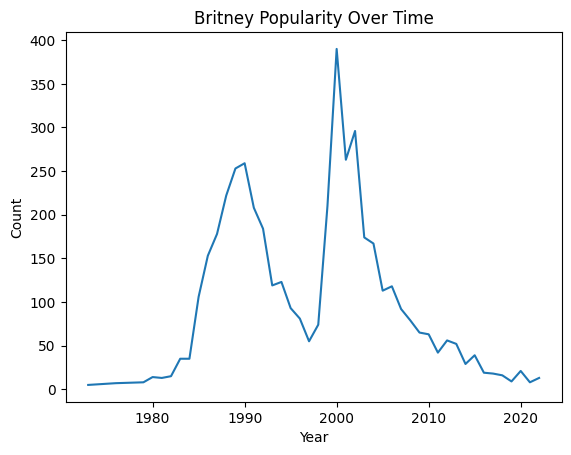

In [37]:
britney_baby_name = baby_names[(baby_names['Name'] == 'Britney') & (baby_names['State'] == 'CA') & (baby_names['Sex'] == 'F')]
plt.plot(britney_baby_name['Year'], britney_baby_name['Count'])
plt.title("Britney Popularity Over Time")
plt.xlabel('Year')
plt.ylabel('Count');

**Your response:** Britney Spears was a very popular musical artist and I think she created two albums at that time, both were incredibly popular. Also that spike in 2003ish is when she created a third album. People being inspired by her couldve named their children Britney in response.

### Question 1.7

Now we will aggregate counts across all 50 states. Use `groupby()` to aggregate the data by "Name" and "Year", then `sum()` "Count" and finally `reset_index()` (this will turn the index, Name in this case, into a column).  

In [38]:
counts_aggregated_by_name_and_year = baby_names.groupby(by = ["Name", "Year"]).sum("Count").reset_index()
counts_aggregated_by_name_and_year

,Name,Year,Count
0,Aaban,2013,6
1,Aaban,2014,6
2,Aadam,2019,6
3,Aadan,2008,12
4,Aadan,2009,6
...,...,...,...
621748,Zyriah,2014,6
621749,Zyriah,2016,5
621750,Zyron,2015,5
621751,Zyrus,2021,5


In [39]:
grader.check("q1_7")

q1_7 results: All test cases passed!

Now you can use the below code to plot the frequency of any name of interest in the United States over time. 

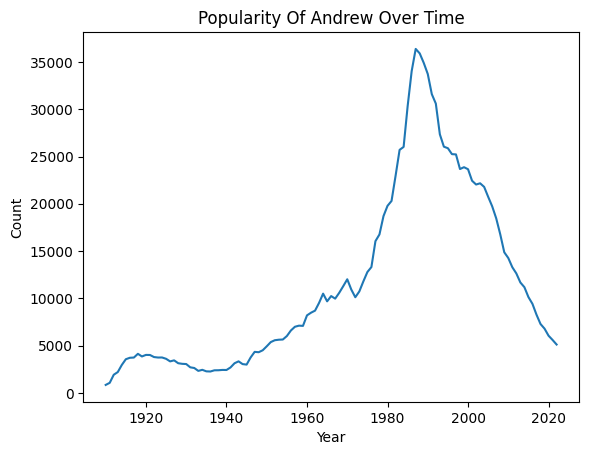

In [40]:
name_of_interest = 'Andrew' #why were their 5 names in 1998 and it's only 1998 
chosen_baby_name = counts_aggregated_by_name_and_year.query("Name == @name_of_interest")
plt.plot(chosen_baby_name['Year'], chosen_baby_name['Count'])
plt.title(f"Popularity Of {name_of_interest} Over Time")
plt.xlabel('Year')
plt.ylabel('Count');

Well done. Now that you've been primed on data manipulation with `pandas`, we're going to do a little more practice without as much hand holding to challenge you. 

## Section 2: Filtering and aggregating COVID data

In [41]:
jobs = pd.read_csv("./data/jobs.csv")
jobs

,observation_date,jobs,labor_force
0,2014-03-01,150036.0,156028
1,2014-04-01,150233.0,155369
2,2014-05-01,150572.0,155684
3,2014-06-01,151229.0,155707
4,2014-07-01,151245.0,156007
...,...,...,...
103,2022-10-01,169255.0,164679
104,2022-11-01,169187.0,164441
105,2022-12-01,170300.0,164998
106,2023-01-01,170577.0,165871


#### Question 2.1

Let's start by creating a new variable (as a column) called "difference" in "jobs" that is the available labor force subtracted from jobs.

In [42]:
jobs["difference"] = jobs["jobs"]-jobs["labor_force"]
jobs.head()

,observation_date,jobs,labor_force,difference
0,2014-03-01,150036.0,156028,-5992.0
1,2014-04-01,150233.0,155369,-5136.0
2,2014-05-01,150572.0,155684,-5112.0
3,2014-06-01,151229.0,155707,-4478.0
4,2014-07-01,151245.0,156007,-4762.0


In [43]:
grader.check("q2_1")

q2_1 results: All test cases passed!

What do positive and negative differences mean? 

For the record I think there was an answer here already but I'll rewrite it.

**Your response**: A positive difference means that there are more jobs than people in the labor force. A negative difference means that there are too many people in the labor force for everyone to have a job.  


#### Question 2.2

For how many months in our time series did the number of jobs exceed the size of the labor force?

In [44]:
months = len(jobs[jobs["difference"] > 0]) #as stated above we want to find when it's positive i.e Difference > 0
months

47

In [45]:
grader.check("q2_2")

q2_2 results: All test cases passed!

#### Question 2.3

Find the date that corresponds to the greatest negative difference between number of jobs and size of the labor force.

In [46]:
jobs

,observation_date,jobs,labor_force,difference
0,2014-03-01,150036.0,156028,-5992.0
1,2014-04-01,150233.0,155369,-5136.0
2,2014-05-01,150572.0,155684,-5112.0
3,2014-06-01,151229.0,155707,-4478.0
4,2014-07-01,151245.0,156007,-4762.0
...,...,...,...,...
103,2022-10-01,169255.0,164679,4576.0
104,2022-11-01,169187.0,164441,4746.0
105,2022-12-01,170300.0,164998,5302.0
106,2023-01-01,170577.0,165871,4706.0


In [47]:
largest_neg_difference = jobs[jobs["difference"] < 0].sort_values('difference').iloc[0]["observation_date"]
largest_neg_difference

'2020-04-01'

Was there something going on at this point in time?

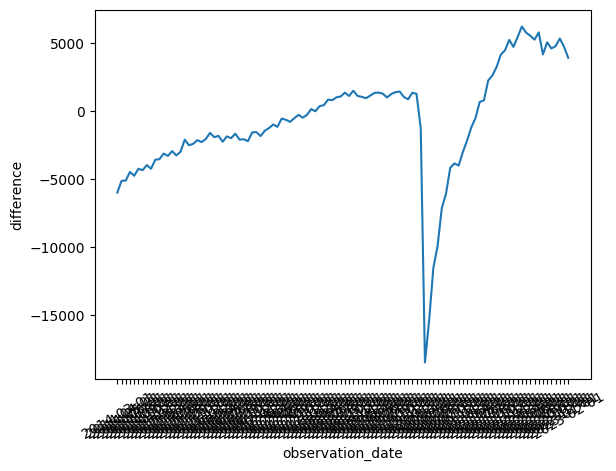

In [48]:
sns.lineplot(x = jobs["observation_date"], y = jobs["difference"])
plt.xticks(rotation=30); 



**Your response**: 1 point. If I remember correctly that was the first full month of covid when everything was shut down.

Now we'll look at some data related to corporate profits before and after COVID.

In [49]:
profits = pd.read_csv("./data/corp_profits.csv")
profits["DATE"] = pd.to_datetime(profits["DATE"])
profits.head()

,DATE,profits_billions,product
0,2001-01-01,-3.680,motor_vehicles
1,2001-04-01,-6.525,motor_vehicles
2,2001-07-01,-4.313,motor_vehicles
3,2001-10-01,-12.627,motor_vehicles
4,2002-01-01,-11.678,motor_vehicles


#### Question 2.4 

What is the date range in our data? Note that we converted "DATE" to a datetime. "datetimes" can be operated on like any numeric variable. 

In [50]:
earliest = np.min(profits["DATE"])
latest = np.max(profits["DATE"])


In [51]:
grader.check("q2_4")

q2_4 results: All test cases passed!

#### Question 2.5 

How were different industries affected by COVID? First, filter that data such that we only have dates beginning on Jan 1st in 2016 and after. Then create a new column in the data called "COVID" and give the value "pre-covid" if the dates are between 2016-01-01 and 2020-03-01, and "post-covid" for anything after. 

In [52]:
profits_recent = profits[profits["DATE"] >= pd.to_datetime('2016-01-01')]

covid_array = np.array([])
cutoff_date = pd.to_datetime('2020-03-01')
for date in profits_recent["DATE"]:       #generates a np.array of values that will be covid and what wont be covid
    if date < cutoff_date:
        covid_array = np.append(covid_array, "pre-covid")
    else:
        covid_array = np.append(covid_array, "post-covid")

profits_recent["COVID"] = covid_array
profits_recent


C:\Users\Andy Ho\AppData\Local\Temp\ipykernel_6724\44142606.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profits_recent["COVID"] = covid_array


,DATE,profits_billions,product,COVID
60,2016-01-01,35.380,motor_vehicles,pre-covid
61,2016-04-01,35.931,motor_vehicles,pre-covid
62,2016-07-01,27.662,motor_vehicles,pre-covid
63,2016-10-01,25.442,motor_vehicles,pre-covid
64,2017-01-01,25.877,motor_vehicles,pre-covid
...,...,...,...,...
274,2023-01-01,130.154,computer_electronics,post-covid
275,2023-04-01,139.027,computer_electronics,post-covid
276,2023-07-01,146.196,computer_electronics,post-covid
277,2023-10-01,161.714,computer_electronics,post-covid


In [53]:
grader.check("q2_5")

q2_5 results: All test cases passed!

#### Questeion 2.6

Now find the average pre- and post-covid profit for each product. Remember that you can group by more than one variable.

In [54]:
profits_recent.groupby(["product", "COVID"]).mean("profits_billions").reset_index()

,product,COVID,profits_billions
0,chemical_products,post-covid,123.618750
1,chemical_products,pre-covid,58.932471
2,computer_electronics,post-covid,131.476188
3,computer_electronics,pre-covid,56.416647
4,motor_vehicles,post-covid,-0.013750
5,motor_vehicles,pre-covid,11.370529


In [55]:
#profits_recent[profits_recent["DATE"] > pd.to_datetime('2020-03-01')] uncomment this cell and change the boolean operator
#to see cutoff dates and general industry changes

Interpret the findings. Why do you think some industries saw increased profits while others saw decreased profits?

**Your response**: 1 point. Well things to consider is that 'post-covid' also includes the pandemic itself. In the pandemic we locked down and shutdown all jobs that weren't seen as essential. This resulted in motor_vehicles (a product that was deemed non-essential) to take a massive hit in profits because there was certainly less being sold. It should be pointed out that the industry has been recovering with the reversal of the lockdown, which is why when you filter on date you would notice that motor vechile profits have recovered from being incredibly negative. As far as chemical_products, covid has made everyone much more aware of the importance of hygiene and being clean. Chemical products as a by product have massively increased post covid considering this culutural trend because people have realized how important hygiene/cleanliness is. As far as computer electronics go, I'm not completely sure of the shift but my guess is that it's less to do with COVID and more to do with the increases in AI. If you examine the general trend of computer_electronics, it was gradually increasing it was relatively unaffected by covid. I guess one thing you could say about the pandemics effect on that is that technology was still widely available during the pandemic such that it's no suprise that it increased.

## Section 3: Cleaning and joining data

We end this homework with an exercise in data cleaning and joining multiple relational datasets.

We have two datasets:
1. A dataset of every COVID treatment center in each incorporated township/city in the US
2. A dataset of the estimated population in each incorporated township/city in the US as of 2013.

Our ultimate goal is to determine which cities had the best COVID treatment infrastructure, represented by COVID treatment centers per capita. 

In [56]:
# COVID treatment centers
treat_centers = pd.read_csv("./data/COVID-19_Treatments_20240927.csv")
# Lowercase the town/city names to canonicalize them with the next dataset.
treat_centers["City"] = treat_centers["City"].str.lower()
treat_centers.head()

,Provider Name,Address 1,Address 2,City,State,Zip,Latitude,Longitude,Geopoint,Last Report Date,Has Paxlovid
0,WALGREENS #3351,6818 N ARMENIA AVE,NaN,tampa,FL,336045718,28.010111,-82.484895,POINT (-82.484895 28.010111),2024-09-20T00:00:00Z,False
1,PHARMALIFE LTC,2951 PIEDMONT RD NE STE B,NaN,atlanta,GA,303052782,33.834900,-84.367529,POINT (-84.367529 33.8349),2024-09-20T00:00:00Z,False
2,OSCO DRUG #3421,1402 21ST ST,NaN,zion,IL,600992304,42.457453,-87.828388,POINT (-87.828388 42.457453),2024-09-20T00:00:00Z,False
3,F & M DRUG LLC,209 N DOUGLAS,NaN,ellsworth,KS,67439,38.729736,-98.230233,POINT (-98.230233 38.729736),2024-09-20T00:00:00Z,False
4,PHARMACY ARTS,31 BURNLEY RD,NaN,scottsville,KY,42164,36.757415,-86.217386,POINT (-86.217386 36.757415),2024-09-20T00:00:00Z,False


In [57]:
treat_centers_in_city = treat_centers.groupby(by = ["State", "City"]).count().reset_index()
treat_centers_in_city
#len(treat_centers_in_city)

,State,City,Provider Name,Address 1,Address 2,Zip,Latitude,Longitude,Geopoint,Last Report Date,Has Paxlovid
0,AK,anchorage,33,33,3,33,33,33,33,33,33
1,AK,cordova,1,1,0,1,1,1,1,1,1
2,AK,delta junction,1,1,0,1,1,1,1,1,1
3,AK,dimond,1,1,0,1,1,1,1,1,1
4,AK,eagle river,5,5,0,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...
11277,WY,thermopolis,1,1,0,1,1,1,1,1,1
11278,WY,torrington,2,2,0,2,2,2,2,2,2
11279,WY,upton,1,1,0,1,1,1,1,1,1
11280,WY,wheatland,3,3,0,3,3,3,3,3,3


#### Question 3.1

Find the number of COVID treatment centers in each town. Remember that each row is a single treatment center, and remember that towns/cities in different states can have the same name. 

*Hint*: The `size()` function will be helpful

In [58]:
treat_counts = treat_centers_in_city[["State", "City", "Provider Name"]].rename(columns = {"Provider Name": "Treat Counts"})
treat_counts

,State,City,Treat Counts
0,AK,anchorage,33
1,AK,cordova,1
2,AK,delta junction,1
3,AK,dimond,1
4,AK,eagle river,5
...,...,...,...
11277,WY,thermopolis,1
11278,WY,torrington,2
11279,WY,upton,1
11280,WY,wheatland,3


In [59]:
grader.check("q3_1")

q3_1 results: All test cases passed!

#### Question 3.2

Let's read in the population data.

In [60]:
# Town/city populations
city_pop = pd.read_csv("./data/pop_est.csv", encoding='latin-1')
city_pop["NAME"] = city_pop["NAME"].str.lower()
city_pop.head()

,NAME,STNAME,POPESTIMATE2023
0,abbeville,Alabama,2377
1,adamsville,Alabama,4172
2,addison,Alabama,667
3,akron,Alabama,224
4,alabaster,Alabama,34107


For whatever reason, the population data has many duplicated rows. First, determine how many rows are duplicated. Second, remove those rows from the data.

The easiest way to do this is with the `duplicated` method. The following cell will call up its documentation. 

In [61]:
city_pop["NAME"] == "new york"
city_pop.duplicated()


0        False
1        False
2        False
3        False
4        False
         ...  
74536     True
74537     True
74538    False
74539     True
74540     True
Length: 74541, dtype: bool

In [62]:
# Remove duplicated rows
duplicated_row_count = np.sum(city_pop.duplicated())
city_pop = city_pop[~city_pop.duplicated()]
#city_pop_no_duplicate[city_pop_no_duplicate["NAME"] == 'new york']
#city_pop_no_duplicate[city_pop_no_duplicate["NAME"] == "new york"]  ask professor as left
#city_pop_no_duplicate.reset_index()
city_pop

,NAME,STNAME,POPESTIMATE2023
0,abbeville,Alabama,2377
1,adamsville,Alabama,4172
2,addison,Alabama,667
3,akron,Alabama,224
4,alabaster,Alabama,34107
...,...,...,...
74521,sweetwater,Wyoming,41249
74528,teton,Wyoming,23232
74530,uinta,Wyoming,20745
74535,washakie,Wyoming,7710


In [63]:
grader.check("q3_2")

q3_2 results: All test cases passed!

#### Question 3.3

We're getting close to joining the treatment centers dataframes and the population dataframe on a shared key. We might be tempted to join them on city names but this would be a careless thing to do (remember that different states can have towns/cities with the same name). This is instead a situation where multiple variables combine to form a unique key: town/city name and state. 

This poses an issue for us. While we have states in both frames, they are formatted differently. Thus, to fully relate them we need to pull in a third relation. 

In [64]:
states = pd.read_csv("./data/States.csv")
states = states.rename(columns = {"State": "STNAME"})
states.head()

,STNAME,Standard,Postal
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


Join states on city_pop such that there is one new column in city_pop called "Postal". You may need to `.drop()` a redundant column after joining.

In [65]:
city_pop = pd.merge(city_pop, states, how = "left", on = "STNAME").drop(columns=["Standard"])
city_pop

,NAME,STNAME,POPESTIMATE2023,Postal
0,abbeville,Alabama,2377,AL
1,adamsville,Alabama,4172,AL
2,addison,Alabama,667,AL
3,akron,Alabama,224,AL
4,alabaster,Alabama,34107,AL
...,...,...,...,...
44090,sweetwater,Wyoming,41249,WY
44091,teton,Wyoming,23232,WY
44092,uinta,Wyoming,20745,WY
44093,washakie,Wyoming,7710,WY


In [66]:
grader.check("q3_3")

q3_3 results: All test cases passed!

#### Question 3.4

Now join city_pop and treat_counts. Ensure that you're only keeping rows where there are key matches i.e. do an "inner" join. 

In [67]:
city_pop = city_pop.rename(columns = {"Postal": "State", "NAME": "City"})

In [68]:
pop_treat_merge = pd.merge(city_pop, treat_counts, how = 'inner', on = ["State", "City"])
pop_treat_merge

,City,STNAME,POPESTIMATE2023,State,Treat Counts
0,abbeville,Alabama,2377,AL,2
1,adamsville,Alabama,4172,AL,1
2,addison,Alabama,667,AL,2
3,alabaster,Alabama,34107,AL,11
4,albertville,Alabama,23031,AL,9
...,...,...,...,...,...
8250,thermopolis,Wyoming,2742,WY,1
8251,torrington,Wyoming,6212,WY,2
8252,upton,Wyoming,888,WY,1
8253,wheatland,Wyoming,3509,WY,3


In [69]:
len(pop_treat_merge) #this was here before

8255

In [70]:
grader.check("q3_4")

q3_4 results: All test cases passed!

#### Question 3.5

To determine the number of treatment centers per capita, we'll need to divide center count by population. There are certain values of one or the other that could cause issues when calculating this quantity. Use the `describe()` method to summarize the quantitative columns in the merged data. 

In [71]:
pop_treat_merge.describe()

,POPESTIMATE2023,Treat Counts
count,8.255000e+03,8255.000000
mean,3.936527e+04,7.217202
std,2.938055e+05,21.746751
min,0.000000e+00,1.000000
25%,2.432500e+03,1.000000
50%,7.364000e+03,3.000000
75%,2.294950e+04,6.000000
max,1.957122e+07,529.000000


If you identify any issues, filter the data to remove those values. Then create a new column called "centers_per_cap" in pop_treat_merge, representing the number of centers per capita in each town/city.

In [72]:
# Treat the data as needed
pop_treat_merge = pop_treat_merge[pop_treat_merge["POPESTIMATE2023"] >= 1] #We dont want to divide by 0, and you cant have less than 1 person
pop_treat_merge

,City,STNAME,POPESTIMATE2023,State,Treat Counts
0,abbeville,Alabama,2377,AL,2
1,adamsville,Alabama,4172,AL,1
2,addison,Alabama,667,AL,2
3,alabaster,Alabama,34107,AL,11
4,albertville,Alabama,23031,AL,9
...,...,...,...,...,...
8250,thermopolis,Wyoming,2742,WY,1
8251,torrington,Wyoming,6212,WY,2
8252,upton,Wyoming,888,WY,1
8253,wheatland,Wyoming,3509,WY,3


In [73]:
# Create centers_per_cap in data
pop_treat_merge["centers_per_cap"] = pop_treat_merge["Treat Counts"]/ pop_treat_merge["POPESTIMATE2023"]
pop_treat_merge

C:\Users\Andy Ho\AppData\Local\Temp\ipykernel_6724\1583851541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_treat_merge["centers_per_cap"] = pop_treat_merge["Treat Counts"]/ pop_treat_merge["POPESTIMATE2023"]


,City,STNAME,POPESTIMATE2023,State,Treat Counts,centers_per_cap
0,abbeville,Alabama,2377,AL,2,0.000841
1,adamsville,Alabama,4172,AL,1,0.000240
2,addison,Alabama,667,AL,2,0.002999
3,alabaster,Alabama,34107,AL,11,0.000323
4,albertville,Alabama,23031,AL,9,0.000391
...,...,...,...,...,...,...
8250,thermopolis,Wyoming,2742,WY,1,0.000365
8251,torrington,Wyoming,6212,WY,2,0.000322
8252,upton,Wyoming,888,WY,1,0.001126
8253,wheatland,Wyoming,3509,WY,3,0.000855


In [74]:
grader.check("q3_5")

q3_5 results: All test cases passed!

#### Question 3.6

Identify the five cities with the highest number of treatment cities per capita.

In [75]:
pop_treat_merge.sort_values("centers_per_cap", ascending = False).head()

,City,STNAME,POPESTIMATE2023,State,Treat Counts,centers_per_cap
5719,youngstown,Ohio,1,OH,23,23.0
3593,lansing,Michigan,6,MI,36,6.0
2617,manhattan,Kansas,8,KS,16,2.0
3872,mankato,Minnesota,5,MN,9,1.8
5456,bellevue,Ohio,2,OH,3,1.5


Do you think your findings are valid? Why or why not?

**Your response**: (1 point) Theres no way that these findings are valid. These cities have too few people, I would imagine that there was an error in data collection.

#### Question 3.7

Filter the data for only population estimates above or equal to 1000, then again identify the top 5 cities. Return the answer as an array or series. 

In [76]:
# Filter the data accordingly
top_5 = pop_treat_merge[pop_treat_merge["POPESTIMATE2023"] >= 1000].sort_values("centers_per_cap", ascending = False).head()

In [77]:
top_cities = top_5["City"]
top_cities

2696      wichita
6857      houston
7837     appleton
5488     columbus
7933    green bay
Name: City, dtype: object

In [78]:
grader.check("q3_7")

q3_7 results: All test cases passed!

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [79]:
grader.check_all()

q1_1 results: All test cases passed!

q1_2 results: All test cases passed!

q1_3a results: All test cases passed!

q1_3b results: All test cases passed!

q1_4 results: All test cases passed!

q1_5 results: All test cases passed!

q1_7 results: All test cases passed!

q2_1 results: All test cases passed!

q2_2 results: All test cases passed!

q2_4 results: All test cases passed!

q2_5 results: All test cases passed!

q3_1 results: All test cases passed!

q3_2 results: All test cases passed!

q3_3 results: All test cases passed!

q3_4 results: All test cases passed!

q3_5 results: All test cases passed!

q3_7 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order. Then execute the following two commands from the File menu:

 - Save and Checkpoint

 - Close and Halt

Then upload your .ipynb file to Canvas assignment Homework 2